## Logistic reg:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN 
from imblearn.over_sampling import SMOTE, SMOTENC, BorderlineSMOTE, RandomOverSampler, SMOTEN

In [2]:
df=pd.read_csv("clean_tel.csv")
df.sample(5)

,Unnamed: 0,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
6315,6315,0,0,70.10,3238.40,1,1,1,1,0,...,1,0,0,0,0,0,0,1,0,0
5834,5834,0,0,105.05,6914.95,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4712,4712,1,0,108.25,5431.40,1,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3095,3095,1,0,84.80,888.75,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
3790,3790,1,0,19.30,28.30,0,0,1,1,0,...,1,0,0,1,1,0,0,0,0,0


In [3]:
df["Churn_Yes"].value_counts()

0    5174
1    1869
Name: Churn_Yes, dtype: int64

In [4]:
X=df.loc[:,df.columns!="Churn_Yes"]
Y=df.loc[:,"Churn_Yes"]
X.head()

,Unnamed: 0,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,0,29.85,29.85,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,1,1,0,56.95,1889.50,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
2,2,1,0,53.85,108.15,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
3,3,1,0,42.30,1840.75,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,0,70.70,151.65,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0


In [5]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn_Yes, dtype: int64

In [6]:
X.drop("Unnamed: 0",axis=1, inplace=True)
X.sample()

C:\Users\fer\AppData\Local\Temp\ipykernel_14496\3522425292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop("Unnamed: 0",axis=1, inplace=True)


,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,InternetService_DSL,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
3779,1,1,79.4,5154.6,1,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)


As we are training the dataset using Logistic regression, so lets scale the values.

In [8]:
sc=StandardScaler()
sc.fit(x_train)
x_train_scaled=sc.transform(x_train)
x_test_scaled=sc.transform(x_test)

In [9]:
x_train_scaled

array([[ 0.99504246, -0.44148597,  0.46782795, ..., -0.35450575,
        -0.36364093, -0.49728063],
       [-1.00498224, -0.44148597,  0.52101927, ..., -0.35450575,
        -0.36364093, -0.49728063],
       [ 0.99504246, -0.44148597, -0.30677057, ..., -0.35450575,
        -0.36364093, -0.49728063],
       ...,
       [ 0.99504246, -0.44148597, -1.47033058, ..., -0.35450575,
        -0.36364093, -0.49728063],
       [-1.00498224,  2.26507764, -0.47964234, ..., -0.35450575,
        -0.36364093, -0.49728063],
       [ 0.99504246, -0.44148597, -0.67246086, ..., -0.35450575,
        -0.36364093, -0.49728063]])

We get an array after scaling so lets convert that back to dataframe.


In [10]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)
x_test_scaled.head()

,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,InternetService_DSL,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0.995042,-0.441486,-0.321731,0.345229,-0.965796,-0.651833,-3.043402,-0.964424,3.043402,1.380442,...,-0.52848,1.892218,-0.711064,-0.54275,-0.666517,-0.41654,-0.363015,-0.354506,2.749965,-0.497281
1,-1.004982,-0.441486,0.145356,-0.102480,-0.965796,-0.651833,0.328580,-0.964424,-0.328580,1.380442,...,-0.52848,1.892218,-0.711064,-0.54275,-0.666517,-0.41654,2.754708,-0.354506,-0.363641,-0.497281
2,0.995042,-0.441486,0.944888,-0.009409,1.035416,-0.651833,0.328580,-0.964424,-0.328580,-0.724405,...,-0.52848,-0.528480,1.406343,-0.54275,-0.666517,2.40073,-0.363015,-0.354506,-0.363641,-0.497281
3,-1.004982,-0.441486,-1.500251,-0.471523,1.035416,-0.651833,0.328580,1.036889,-0.328580,-0.724405,...,-0.52848,1.892218,-0.711064,-0.54275,-0.666517,-0.41654,-0.363015,-0.354506,-0.363641,2.010937
4,0.995042,-0.441486,1.264035,-0.609719,1.035416,1.534135,0.328580,-0.964424,-0.328580,-0.724405,...,-0.52848,1.892218,-0.711064,-0.54275,1.500337,-0.41654,-0.363015,-0.354506,-0.363641,-0.497281


In [11]:
np.round(x_train_scaled.describe(),1)

,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,InternetService_DSL,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
count,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,...,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,...,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-0.4,-1.5,-1.0,-1.0,-0.7,-3.0,-1.0,-0.3,-0.7,...,-0.5,-0.5,-0.7,-0.5,-0.7,-0.4,-0.4,-0.4,-0.4,-0.5
25%,-1.0,-0.4,-1.0,-0.8,-1.0,-0.7,0.3,-1.0,-0.3,-0.7,...,-0.5,-0.5,-0.7,-0.5,-0.7,-0.4,-0.4,-0.4,-0.4,-0.5
50%,1.0,-0.4,0.2,-0.4,-1.0,-0.7,0.3,-1.0,-0.3,-0.7,...,-0.5,-0.5,-0.7,-0.5,-0.7,-0.4,-0.4,-0.4,-0.4,-0.5
75%,1.0,-0.4,0.8,0.7,1.0,1.5,0.3,1.0,-0.3,1.4,...,-0.5,-0.5,1.4,-0.5,1.5,-0.4,-0.4,-0.4,-0.4,-0.5
max,1.0,2.3,1.8,2.8,1.0,1.5,0.3,1.0,3.0,1.4,...,1.9,1.9,1.4,1.8,1.5,2.4,2.8,2.8,2.7,2.0


*Effects of Scaling:*

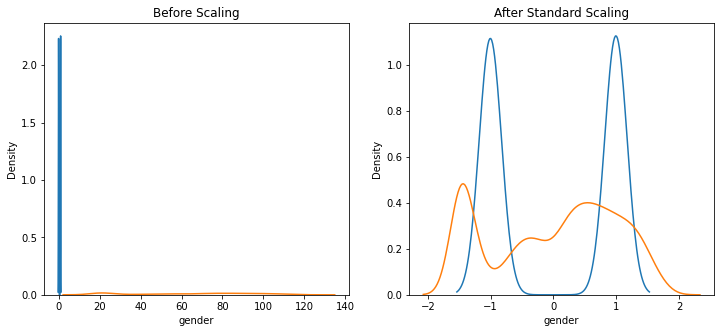

In [12]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(x_train["gender"],ax=ax1)
sns.kdeplot(x_train["MonthlyCharges"],ax=ax1)

#after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled["gender"], ax=ax2)
sns.kdeplot(x_train_scaled["MonthlyCharges"], ax=ax2)
plt.show()

As you can see that the values are now distributed close to each other which will help in getting better confusion matrix.

In [13]:
log_reg=LogisticRegression()
log_reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [14]:
y_pred=log_reg.predict(x_test)

In [15]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))


[[1029    0]
 [ 380    0]]
0.730305180979418
0.0
0.0
0.0


c:\Users\fer\anaconda3\envs\deep\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we can see, our model is doing really bad as FN in confusion matrix is really high. This is because our dataset is highly imbalanced as we checked earlier. So lets perform upsampling.

In [16]:
X.head()

,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,InternetService_DSL,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,1,0,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,1,0,53.85,108.15,0,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,1,0,42.30,1840.75,0,0,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
4,0,0,70.70,151.65,0,0,1,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [17]:
# sm=SMOTEENN(random_state=42)
# x_resampled,y_resampled=sm.fit_resample(X, Y)

# sm=SMOTE()
# x_resampled,y_resampled=sm.fit_resample(x_train, y_train)

# sm = BorderlineSMOTE(random_state=42)
# x_resampled,y_resampled=sm.fit_resample(X,Y)

# ros = RandomOverSampler(random_state=42)
# X_res, y_res = ros.fit_resample(X, Y)
# print('Resampled dataset shape %s' % Counter(y_res))

# sm = SMOTENC(random_state=42, categorical_features=None)
# X_res, y_res = sm.fit_resample(X, Y)
# print(f'Resampled dataset samples per class {Counter(y_res)}')

sampler = SMOTEN(random_state=0)
X_res, y_res = sampler.fit_resample(X, Y)
print(f"Class counts after resampling {Counter(y_res)}")

Class counts after resampling Counter({0: 5174, 1: 5174})


In [18]:
x_train_resampled,x_test_resampled,y_train_resampled,y_test_resampled=train_test_split(X_res,y_res,test_size=0.2)

In [19]:
# col = np.array(X.columns)

# for i in range(len(col)):
#     print((X[col[i]]==None).value_counts())

col = np.array(X.columns)

for i in range(len(col)):
    print((X[col[i]]).value_counts())

1    3555
0    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64
2283.300441    11
20.200000      11
19.750000       9
20.050000       8
19.900000       8
               ..
6849.400000     1
692.350000      1
130.150000      1
3211.900000     1
6844.500000     1
Name: TotalCharges, Length: 6531, dtype: int64
0    3641
1    3402
Name: Partner_Yes, dtype: int64
0    4933
1    2110
Name: Dependents_Yes, dtype: int64
1    6361
0     682
Name: PhoneService_Yes, dtype: int64
0    3653
1    3390
Name: MultipleLines_No, dtype: int64
0    6361
1     682
Name: MultipleLines_No phone service, dtype: int64
0    4622
1    2421
Name: InternetService_DSL, dtype: int64
0    3947
1    3096
Name: InternetService_Fiber optic, dtype: int64
0    5517
1    1526
Name: InternetService_

In [20]:
sc=StandardScaler()
sc.fit(x_train_resampled)
x_tr_sc_r=sc.transform(x_train_resampled)
x_te_sc_r=sc.transform(x_test_resampled)
x_tr_sc_r

array([[ 1.08555104, -0.44727842, -0.55021378, ...,  3.50228863,
        -0.30888223, -0.41435665],
       [-0.92119114, -0.44727842,  1.03289319, ..., -0.28552758,
        -0.30888223,  2.41337985],
       [-0.92119114, -0.44727842, -1.57311716, ..., -0.28552758,
        -0.30888223, -0.41435665],
       ...,
       [-0.92119114, -0.44727842,  1.25094712, ..., -0.28552758,
        -0.30888223, -0.41435665],
       [ 1.08555104, -0.44727842,  0.32022913, ..., -0.28552758,
        -0.30888223, -0.41435665],
       [-0.92119114, -0.44727842,  0.08799284, ..., -0.28552758,
        -0.30888223, -0.41435665]])

In [21]:
x_tr_sc_r=pd.DataFrame(x_tr_sc_r,columns=x_train_resampled.columns)
x_te_sc_r=pd.DataFrame(x_te_sc_r,columns=x_test_resampled.columns)
x_te_sc_r.head()

,gender,SeniorCitizen,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,InternetService_DSL,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,-0.921191,-0.447278,0.169541,-0.823634,-0.818100,-0.534419,0.320246,-0.872297,-0.289223,-0.671761,...,-0.467938,-0.455616,1.194808,-0.501774,1.257149,-0.402274,-0.310989,-0.285528,-0.308882,-0.414357
1,1.085551,-0.447278,-0.161971,0.521335,-0.818100,-0.534419,-3.122603,-0.872297,3.457545,1.488626,...,2.137034,-0.455616,-0.836955,-0.501774,-0.795451,-0.402274,-0.310989,3.502289,-0.308882,-0.414357
2,-0.921191,-0.447278,0.353912,-0.821157,-0.818100,-0.534419,0.320246,1.146399,-0.289223,-0.671761,...,-0.467938,-0.455616,-0.836955,-0.501774,-0.795451,2.485866,-0.310989,-0.285528,-0.308882,-0.414357
3,1.085551,-0.447278,0.240453,1.532813,1.222344,1.871192,0.320246,-0.872297,-0.289223,1.488626,...,-0.467938,2.194832,-0.836955,-0.501774,-0.795451,-0.402274,-0.310989,-0.285528,-0.308882,2.413380
4,-0.921191,-0.447278,-0.395981,-0.288681,-0.818100,1.871192,0.320246,1.146399,-0.289223,1.488626,...,-0.467938,-0.455616,-0.836955,-0.501774,-0.795451,-0.402274,-0.310989,-0.285528,-0.308882,-0.414357


In [22]:
log_reg=LogisticRegression()
log_reg.fit(x_tr_sc_r,y_train_resampled)

c:\Users\fer\anaconda3\envs\deep\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred=log_reg.predict(x_te_sc_r)

In [24]:
cm=confusion_matrix(y_test_resampled,y_pred)
print(cm)
print(accuracy_score(y_test_resampled,y_pred))
print(f1_score(y_test_resampled,y_pred))
print(precision_score(y_test_resampled,y_pred))
print(recall_score(y_test_resampled,y_pred))
print(classification_report(y_test_resampled,y_pred))

[[917 123]
 [221 809]]
0.8338164251207729
0.8246687054026504
0.8680257510729614
0.7854368932038835
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1040
           1       0.87      0.79      0.82      1030

    accuracy                           0.83      2070
   macro avg       0.84      0.83      0.83      2070
weighted avg       0.84      0.83      0.83      2070



Much better than earlier. Lets try some other classification methods:
# Random Forest Classifier:

In [25]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)


In [26]:
model_rf.fit(x_tr_sc_r,y_train_resampled)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [27]:
y_pred_rf=model_rf.predict(x_te_sc_r)

In [28]:
cm=confusion_matrix(y_test_resampled,y_pred_rf)
print(cm)
print(accuracy_score(y_test_resampled,y_pred_rf))
print(f1_score(y_test_resampled,y_pred_rf))
print(precision_score(y_test_resampled,y_pred_rf))
print(recall_score(y_test_resampled,y_pred_rf))
print(classification_report(y_test_resampled,y_pred_rf))

[[850 190]
 [176 854]]
0.8231884057971014
0.8235294117647058
0.8180076628352491
0.829126213592233
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1040
           1       0.82      0.83      0.82      1030

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



As we can see that the logistic regression performed better.

# Decision Tree:

In [29]:
des_tr=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)


In [30]:
des_tr.fit(x_tr_sc_r,y_train_resampled)
y_predict_dt = des_tr.predict(x_te_sc_r)
print(metrics.classification_report(y_test_resampled,y_predict_dt))
cm=confusion_matrix(y_test_resampled,y_predict_dt)
print(cm)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1040
           1       0.83      0.81      0.82      1030

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070

[[874 166]
 [199 831]]


Still logistic reg model looks better.

# KNN:

In [31]:

knn=KNeighborsClassifier(n_neighbors=91, p=1,
                           weights='uniform', n_jobs=-1)

In [32]:
#SMOTE and SMOTEENN also use knn technique nd same error occured while using that.

knn.fit(x_tr_sc_r,y_train_resampled)
y_predict_knn = knn.predict(x_te_sc_r)
print(metrics.classification_report(y_test_resampled,y_predict_knn))
cm=confusion_matrix(y_test_resampled,y_predict_knn)
print(cm)

AttributeError: 'NoneType' object has no attribute 'split'

# Decision trees with AdaBoost

In [ ]:

boosting_dtree = DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy',
                                        max_depth=1, random_state=0)
adaboot = AdaBoostClassifier(base_estimator=boosting_dtree,
                             n_estimators=285, learning_rate=0.1,
                             random_state=0)

In [ ]:
adaboot.fit(x_tr_sc_r,y_train_resampled)
y_predict_dtab = adaboot.predict(x_te_sc_r)
print(metrics.classification_report(y_test_resampled,y_predict_dtab))
cm=confusion_matrix(y_test_resampled,y_predict_dtab)
print(cm)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1053
           1       0.81      0.83      0.82      1017

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070

[[855 198]
 [174 843]]
